In [4]:
import numpy as np
import pandas as pd
import gudhi as gd  
from sklearn import manifold
from pylab import *
%matplotlib inline
import sklearn_tda

In [5]:
import gudhi
rips_complex = gudhi.RipsComplex(points=[[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]],
                                 max_edge_length=12.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))


Rips complex is of dimension 1 - 18 simplices - 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[4, 6] -> 9.49
[3, 6] -> 11.00


In [6]:
BarCodes_Rips0 = simplex_tree.persistence()
for i in (BarCodes_Rips0):
    print(i)

(0, (0.0, inf))
(0, (0.0, 8.94427190999916))
(0, (0.0, 7.280109889280518))
(0, (0.0, 6.082762530298219))
(0, (0.0, 5.830951894845301))
(0, (0.0, 5.385164807134504))
(0, (0.0, 5.0))


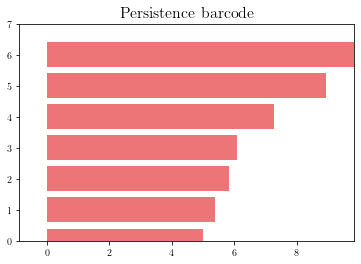

In [11]:
gudhi.plot_persistence_barcode(BarCodes_Rips0)

[(0, (3.1622776601683795, inf)), (0, (3.1622776601683795, 5.39834563766817)), (0, (3.1622776601683795, 5.39834563766817))]


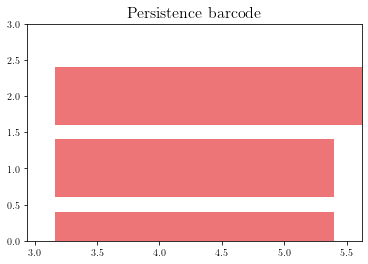

In [13]:
import numpy as np
from scipy.spatial.distance import cdist
from gudhi.point_cloud.dtm import DistanceToMeasure
from gudhi.weighted_rips_complex import WeightedRipsComplex
from gudhi import plot_persistence_barcode
pts = np.array([[2.0, 2.0], [0.0, 1.0], [3.0, 4.0]])
dist = cdist(pts,pts)
dtm = DistanceToMeasure(2, q=2, metric="precomputed")
r = dtm.fit_transform(dist)
w_rips = WeightedRipsComplex(distance_matrix=dist, weights=r)
st = w_rips.create_simplex_tree(max_dimension=2)
print(st.persistence())
plot_persistence_barcode(st.persistence())

[[2. 2.]
 [0. 1.]
 [3. 4.]] [[0 1 2]]


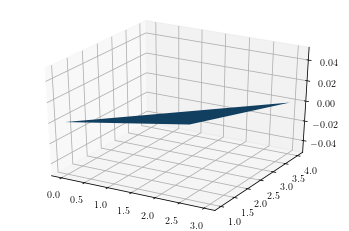

In [24]:
points = pts
rc = w_rips

# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])

print(pts, triangles)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], [0,0,0], triangles=triangles)
plt.show()

In [25]:

# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 238 edges and 91 nodes in 0:00:01.492113.
Wrote visualization to: make_circles_keplermapper_output.html


hip information --\\u003e\\n\\n\\n\\n\\u003chr\\u003e \\u003cbr/\\u003e\\n\\n\\u003ch3\\u003eMembers\\u003c/h3\\u003e\\n\\n6\\n\\n39\\n\\n48\\n\\n91\\n\\n103\\n\\n113\\n\\n151\\n\\n166\\n\\n211\\n\\n220\\n\\n239\\n\\n250\\n\\n266\\n\\n300\\n\\n345\\n\\n363\\n\\n386\\n\\n411\\n\\n438\\n\\n441\\n\\n553\\n\\n566\\n\\n573\\n\\n592\\n\\n659\\n\\n661\\n\\n694\\n\\n757\\n\\n798\\n\\n812\\n\\n844\\n\\n877\\n\\n926\\n\\n1008\\n\\n1015\\n\\n1027\\n\\n1116\\n\\n1138\\n\\n1143\\n\\n1172\\n\\n1248\\n\\n1256\\n\\n1308\\n\\n1377\\n\\n1389\\n\\n1421\\n\\n1429\\n\\n1486\\n\\n1522\\n\\n1632\\n\\n1639\\n\\n1673\\n\\n1720\\n\\n1759\\n\\n1763\\n\\n1778\\n\\n1872\\n\\n1873\\n\\n1893\\n\\n1954\\n\\n1996\\n\\n2016\\n\\n2020\\n\\n2047\\n\\n2148\\n\\n2163\\n\\n2167\\n\\n2294\\n\\n2320\\n\\n2322\\n\\n2327\\n\\n2336\\n\\n2353\\n\\n2358\\n\\n2470\\n\\n2481\\n\\n2486\\n\\n2506\\n\\n2535\\n\\n2668\\n\\n2677\\n\\n2683\\n\\n2728\\n\\n2732\\n\\n2733\\n\\n2738\\n\\n2750\\n\\n2775\\n\\n2785\\n\\n2860\\n\\n2884\\n\\n2902\

In [26]:
from simplicial import *

c = SimplicialComplex()

In [27]:
# add a simplex with a generated name
s1 = c.addSimplex()

# add simplices whose names we want to specify
s2 = c.addSimplex(id = 2)
s3 = c.addSimplex(id = 3)

In [28]:
l23 = c.addSimplex(fs = [ 2, 3 ])

In [29]:
l12 = c.addSimplex(fs = [ s1, 2 ])
l31 = c.addSimplex(fs = [ s1, 3 ])

# create the triangle
t123 = c.addSimplex(fs = [l12, l23, l31])

In [30]:
txyz = c.addSimplexOfOrder(2, id = 'xyz')

AttributeError: 'SimplicialComplex' object has no attribute 'addSimplexOfOrder'

In [36]:
import simplicial as simplicial

In [44]:
help(c)

Help on SimplicialComplex in module simplicial.simplicialcomplex object:

class SimplicialComplex(builtins.object)
 |  A finite abstract simplicial complex.
 |  
 |  A simplicial :term:`complex` is a generalisation of a network in which
 |  vertices (0-simplices) and edges (1-simplices) can be composed
 |  into triangles (2-simplices), tetrahedrons (3-simplices) and so
 |  forth. This class actually implements closed simplicial complexes
 |  that contain every simplex, every :term:`face` of that simplex, every face
 |  of those simplices, and so forth. Operations to add and remove
 |  simplices cascade to keep the complex closed: if a simplex is an
 |  element of a complex, then all its faces are also elements, and so
 |  on recursively.
 |  
 |  The class also includes some more advanced topological operations, notably for
 |  computing the :term:`Euler characteristic` of a complex, and for
 |  computational :term:`homology`.
 |  
 |  Methods defined here:
 |  
 |  Z(self, ks=None)
 |


Duffing.py


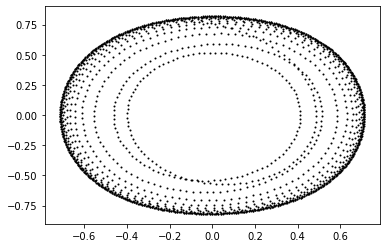

<Figure size 432x288 with 0 Axes>

In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 21 06:03:32 2018
@author: nolte
D. D. Nolte, Introduction to Modern Dynamics: Chaos, Networks, Space and Time, 2nd ed. (Oxford,2019)
"""
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
# model_case 1 = Pendulum
# model_case 2 = Double Well
print(' ')
print('Duffing.py')
 
alpha = 1
beta = 1
delta = 0.3
gam = 0.35
w = 1.2


def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    return[a,b,c]
                 
T = 2*np.pi/w
 
px1 = 0 # np.random.rand(1)
xp1 = 0 # np.random.rand(1)
w1 = 0
 
x_y_z = [xp1, px1, w1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)
x0 = x_t[39999,0:3]
 
tspan = np.linspace(1,2000,40000)
x_t = integrate.odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]
     
plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [43]:
import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:150])
la = xx(y2[1:150])
pd.DataFrame(np.array(list(zip(ll,la)))).to_csv("./InteractiveJPDwB/data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')


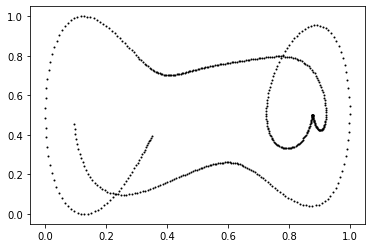

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(2)
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
ll = xx(y1[1:500])
la = xx(y2[1:500])
lines = plt.plot(ll,la,'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
plt.savefig('Duffing')

In [36]:
a = np.array([2*i for i in [-1,-2,-3, -4,1,2,3,4]])

In [ ]:
700.0,709.0
7.0,11.0
4.0,712.0
708.0,8.0
336.0,367.0

In [38]:
np.interp(a, (a.min(), a.max()), (0, +1))

array([0.375, 0.25 , 0.125, 0.   , 0.625, 0.75 , 0.875, 1.   ])